<a href="https://colab.research.google.com/github/Fpinto99/Time_Series/blob/main/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['Quarter', 'Beer', 'Tobacco', 'Bricks', 'Cement', 'Electricity', 'Gas'], dtype='object')
Index(['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close',
       'Volume'],
      dtype='object')


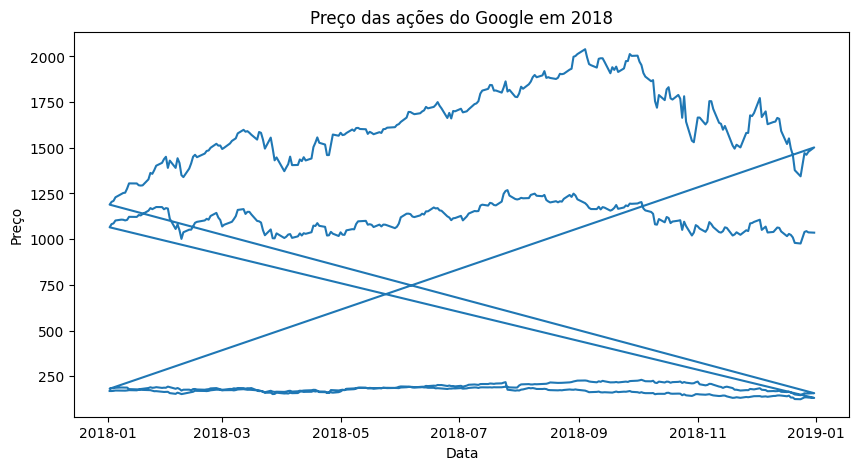

ADF Test Statistic: -1.7127477722716613
p-value: 0.42455669869739027


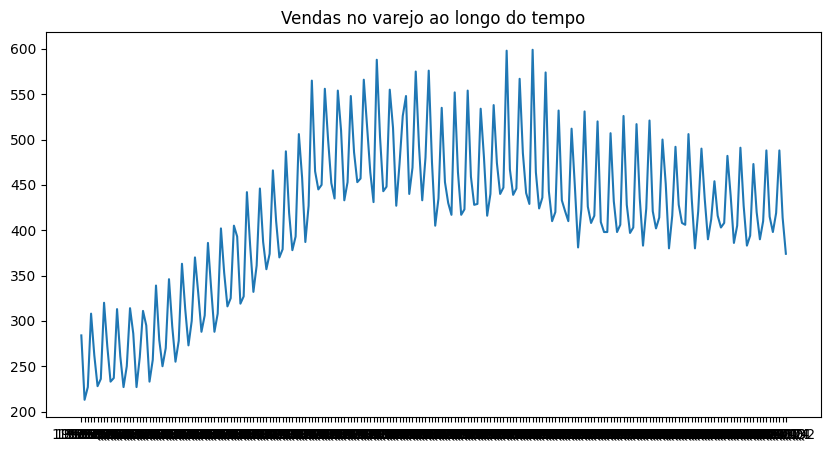

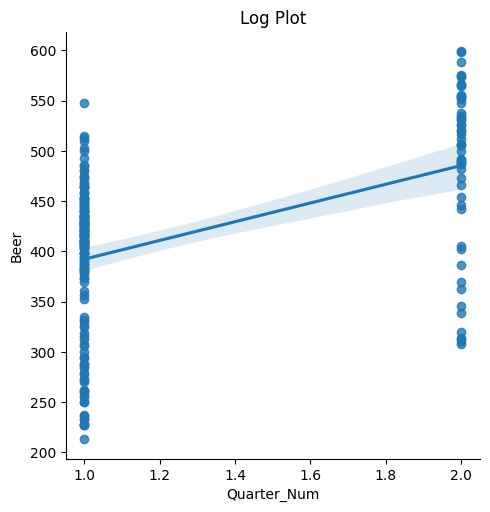

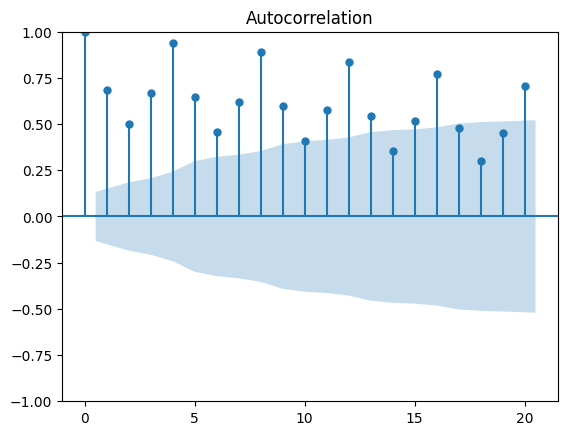

ConversionError: Failed to convert value(s) to axis units: (datetime.date(1970, 1, 1), datetime.date(1970, 1, 2))

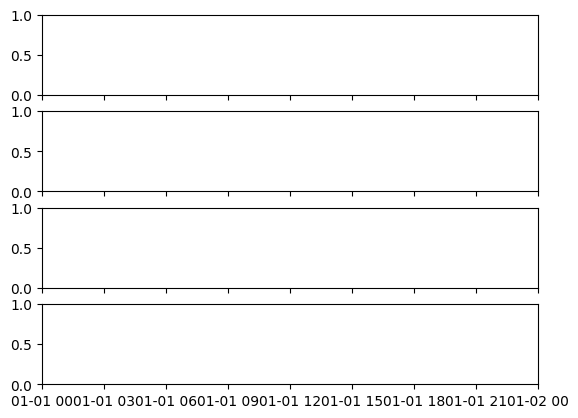

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

gafa_data = pd.read_csv('gafa_stock.csv')
aus_data = pd.read_csv('aus_production.csv')
print(aus_data.columns)
print(gafa_data.columns)

# Exercício 1a
gafa_data['Date'] = pd.to_datetime(gafa_data['Date'])
google_2018 = gafa_data[(gafa_data['Date'] >= '2018-01-01') & (gafa_data['Date'] <= '2018-12-31')]
plt.figure(figsize=(10,5))
plt.plot(google_2018['Date'], google_2018['Adj_Close'])
plt.title("Preço das ações do Google em 2018")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.show()


adf_test = adfuller(google_2018['Adj_Close'].dropna())
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# Execício 1b
plt.figure(figsize=(10,5))
plt.plot(aus_data['Quarter'], aus_data['Beer'])
plt.title("Vendas no varejo ao longo do tempo")
plt.show()


aus_data['Quarter'] = pd.to_datetime(aus_data['Quarter'].str.replace(' ', ''), format='%YQ%m').dt.to_period('Q')

aus_data = aus_data.set_index('Quarter').sort_index()

aus_data['Quarter_Num'] = aus_data.index.quarter

sns.lmplot(x='Quarter_Num', y='Beer', data=aus_data.reset_index())
plt.title("Log Plot")
plt.show()

plot_acf(aus_data['Beer'].dropna(), lags=20)
plt.show()

stl = STL(aus_data['Beer'], seasonal=13, period =4)
res = stl.fit()
res.plot()
plt.show()


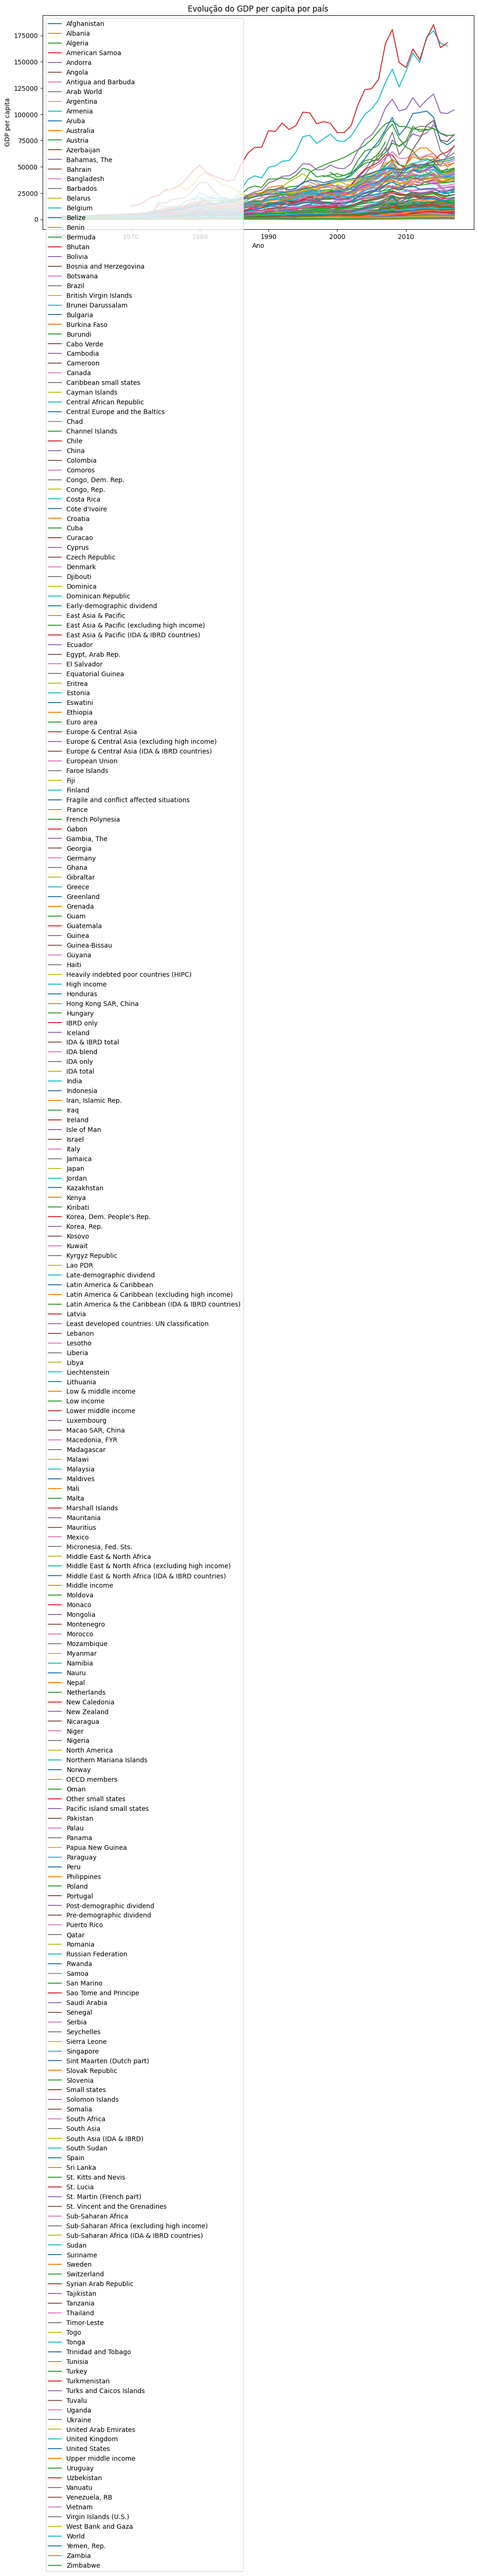

País com maior GDP per capita: Monaco
Lambda Box-Cox para Tobacco: 1.4082006190171106
Lambda Box-Cox para Economy class passengers: 0.12408003752268275


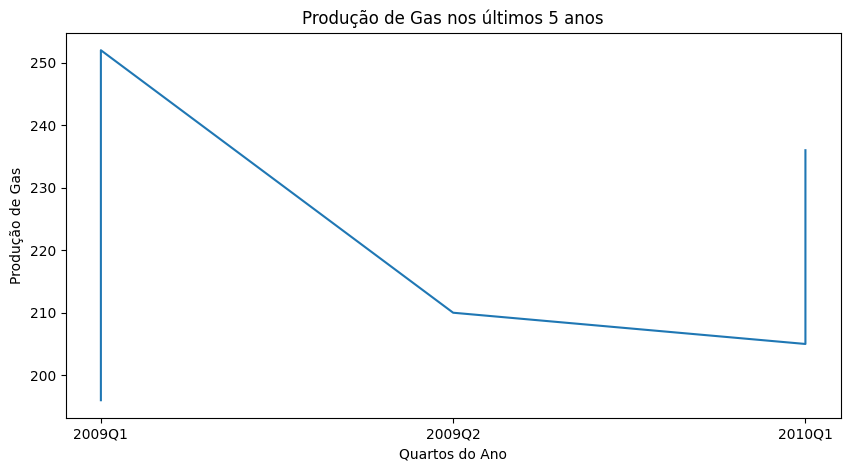

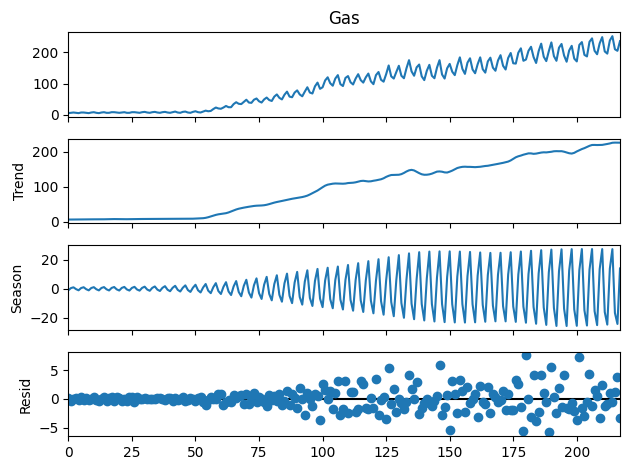

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from statsmodels.tsa.seasonal import STL


global_economy = pd.read_csv('global_economy.csv')
aus_production = pd.read_csv('aus_production.csv')
ansett = pd.read_csv('ansett.csv')

# a
global_economy['GDP_per_capita'] = global_economy['GDP'] / global_economy['Population']
plt.figure(figsize=(12, 6))
for country in global_economy['Country'].unique():
    subset = global_economy[global_economy['Country'] == country]
    plt.plot(subset['Year'], subset['GDP_per_capita'], label=country)
plt.xlabel('Ano')
plt.ylabel('GDP per capita')
plt.title('Evolução do GDP per capita por país')
plt.legend()
plt.show()

max_gdp_country = global_economy.loc[global_economy['GDP_per_capita'].idxmax(), 'Country']
print(f'País com maior GDP per capita: {max_gdp_country}')

# b.


# c.
def apply_boxcox(series):
    transformed, lambda_val = boxcox(series.dropna() + 1)
    return transformed, lambda_val


tobacco_transformed, lambda_tobacco = apply_boxcox(aus_production['Tobacco'])
economy_transformed, lambda_economy = apply_boxcox(ansett['Passengers'])

print(f'Lambda Box-Cox para Tobacco: {lambda_tobacco}')
print(f'Lambda Box-Cox para Economy class passengers: {lambda_economy}')

# d
aus_production['Quarter'] = pd.to_datetime(aus_production['Quarter'].str.replace(' ', ''), format='%YQ%m').dt.to_period('Q')
max_quarter = aus_production['Quarter'].max()
cutoff_quarter = max_quarter - 5
gas = aus_production[aus_production['Quarter'] >= cutoff_quarter]
plt.figure(figsize=(10, 5))
plt.plot(gas['Quarter'].astype(str), gas['Gas'])
plt.xlabel('Quartos do Ano')
plt.ylabel('Produção de Gas')
plt.title('Produção de Gas nos últimos 5 anos')
plt.show()


stl = STL(aus_production['Gas'], seasonal=13, period = 4)
res = stl.fit()
res.plot()
plt.show()
